In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Housing Price data set.csv")
df.describe()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [3]:
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
df.dtypes

Unnamed: 0      int64
price         float64
lotsize         int64
bedrooms        int64
bathrms         int64
stories         int64
driveway       object
recroom        object
fullbase       object
gashw          object
airco          object
garagepl        int64
prefarea       object
dtype: object

# Removing Catogorical features

In [5]:
data = df.loc[:, ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']]
price = df.loc[:, ['price']]

In [6]:
data.head()

,lotsize,bedrooms,bathrms,stories,garagepl
0,5850,3,1,2,1
1,4000,2,1,1,0
2,3060,3,1,1,0
3,6650,3,1,2,0
4,6360,2,1,1,0


# Normalising

In [7]:
mean = data.mean()
std  = data.std()
normalized_data = (data - mean) / std

In [8]:
std

lotsize     2168.158725
bedrooms       0.737388
bathrms        0.502158
stories        0.868203
garagepl       0.861307
dtype: float64

In [9]:
mean

lotsize     5150.265568
bedrooms       2.965201
bathrms        1.285714
stories        1.807692
garagepl       0.692308
dtype: float64

In [10]:
normalized_data.head()

,lotsize,bedrooms,bathrms,stories,garagepl
0,0.322732,0.047192,-0.568973,0.221501,0.357239
1,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [18]:
normalized_data['bias'] = np.ones(normalized_data.shape[0])
x = normalized_data.loc[:,['bias', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']]
x.head()

,bias,lotsize,bedrooms,bathrms,stories,garagepl
0,1.0,0.322732,0.047192,-0.568973,0.221501,0.357239
1,1.0,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,1.0,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,1.0,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,1.0,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [13]:
def cost(x, y, w):
    m = len(y)
    return np.sum((np.dot(x, w) - y) ** 2) / (2 * m)    

In [14]:
alpha = 0.001
iterations = 10000
y = price
lamb = 500

In [15]:
def gradient_descend(x, y, alpha, lamb, iterations):
    m = len(y)
    cost_list = []
    w = np.zeros((6,1))

    for i in range(iterations):
        w1 = w
        w1[0] = 0
        grade = (np.dot((np.dot(x,w) - y).T,x).T + lamb * w1) / m
        w = w - alpha * grade
        cost_list.append(cost(x, y, w))
    return cost_list, w
    

In [16]:
def rms_error(x, y, w):
    h = np.dot(x, w)
    e = np.dot((h - y).T,(h - y)) / len(y)
    return np.sqrt(e[0][0])

price    2.453237e+09
dtype: float64
70046.23471887488


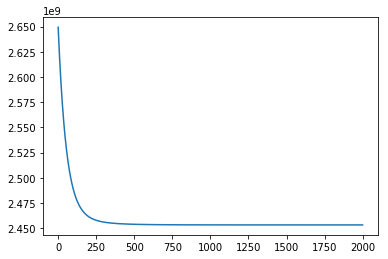

In [17]:
cost_list, w = gradient_descend(x, y, alpha=0.005, lamb=0.05, iterations=2000)
plt.plot(cost_list)
print(cost_list[-1])
print(rms_error(x, y, w))